In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
net = pd.read_csv(r"C:\Users\admin\Downloads\Netflix Dataset.csv")
net.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [7]:
#To show columns name
net.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [9]:
#To show no of rows and columns
net.shape

(7789, 11)

In [11]:
#To show indexes,columns,data-type,memory
net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [12]:
#To show no of elements in the dataset
net.size

85679

In [13]:
#To show the data-type of each column
net.dtypes

Show_Id         object
Category        object
Title           object
Director        object
Cast            object
Country         object
Release_Date    object
Rating          object
Duration        object
Type            object
Description     object
dtype: object

Task1 : Is there any duplicate in this data set? if yes remove duplicate.

In [17]:
#To show duplicate record use [duplicated()]
net[net.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [20]:
#Output

#To remove from dataset use [drop_duplicates()]
net.drop_duplicates(inplace=True)

In [21]:
net.shape

(7787, 11)

Task2 : Is there any null values in any column, show in heat map

In [22]:
net.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<AxesSubplot:>

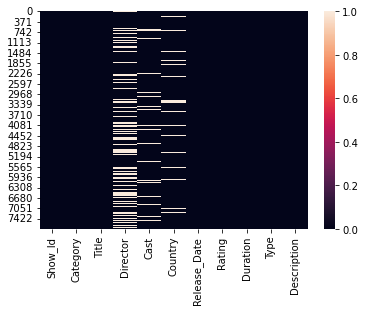

In [25]:
sns.heatmap(net.isnull())

Q1 : For 'House of cards',what is the show id and director of the show?

In [30]:
#Output

net[net['Title'].isin(['House of Cards'])]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [5]:
net[net['Title'].str.contains('House of Cards')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2832,s2833,TV Show,House of Cards,"Robin Wright, David Fincher, Gerald McRaney, J...","Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"November 2, 2018",TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


Q2 : In which year the highest number of TV shows and movies released? show in bar graph

In [16]:
#Release_Date is in object type

net['Rel_Date']=pd.to_datetime(net['Release_Date'])

In [7]:
net.head(1)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Rel_Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14


In [9]:
net['Rel_Date'].dt.year.value_counts()

2019.0    2154
2020.0    2010
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Rel_Date, dtype: int64

<AxesSubplot:>

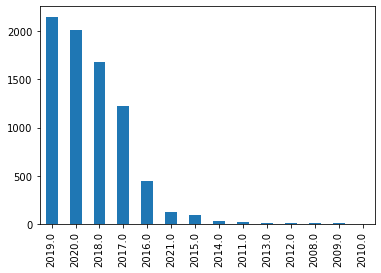

In [11]:
#Output

net['Rel_Date'].dt.year.value_counts().plot(kind='bar')
plt.xaxes

In [ ]:
Q3 : How many movies an TV shows are in dataset?show in bar graph

In [19]:
net.groupby('Category').Category.count()

Category
Movie      5379
TV Show    2410
Name: Category, dtype: int64

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

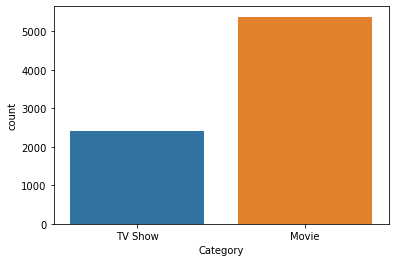

In [24]:
#Output

#net.groupby('Category').Category.count().plot(kind='bar')
                           #OR
sns.countplot(net['Category'])
#sns.countplot(df['Col_name']) - To show the count of all unique values of any column in the form of bar graph.

Q4 : Show all the movies which released on 2011

In [17]:
#Sep year from date

net['Year'] = net['Rel_Date'].dt.year

In [40]:
#Output

net[(net['Category']=='Movie') & (net['Year']==2011)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Rel_Date,Year
232,s233,Movie,A Stoning in Fulham County,Larry Elikann,"Ken Olin, Jill Eikenberry, Maureen Mueller, Gr...",United States,"October 1, 2011",TV-14,95 min,Dramas,"After reckless teens kill an Amish child, a pr...",2011-10-01,2011.0
308,s309,Movie,Adam: His Song Continues,Robert Markowitz,"Daniel J. Travanti, JoBeth Williams, Richard M...",United States,"October 1, 2011",TV-MA,96 min,Dramas,"After their child was abducted and murdered, J...",2011-10-01,2011.0
2041,s2042,Movie,Even the Rain,Icíar Bollaín,"Luis Tosar, Gael García Bernal, Juan Carlos Ad...","Spain, Mexico, France","May 17, 2011",TV-MA,103 min,"Dramas, International Movies",While making a film about the incursion of Chr...,2011-05-17,2011.0
2622,s2623,Movie,Hard Lessons,Eric Laneuville,"Denzel Washington, Lynn Whitfield, Richard Mas...",United States,"October 1, 2011",TV-14,94 min,Dramas,This drama based on real-life events tells the...,2011-10-01,2011.0
2962,s2963,Movie,In Defense of a Married Man,Joel Oliansky,"Judith Light, Michael Ontkean, Jerry Orbach, P...",United States,"October 1, 2011",TV-14,94 min,Dramas,A lawyer's husband is having an affair. When h...,2011-10-01,2011.0
3221,s3222,Movie,Joseph: King of Dreams,"Rob LaDuca, Robert C. Ramirez","Ben Affleck, Mark Hamill, Richard Herd, Mauree...",United States,"September 27, 2011",TV-PG,75 min,"Children & Family Movies, Dramas, Faith & Spir...",With his gift of dream interpretation and his ...,2011-09-27,2011.0
5042,s5042,Movie,Quiet Victory: The Charlie Wedemeyer Story,Roy Campanella II,"Pam Dawber, Michael Nouri, Bess Meyer, Peter B...",United States,"October 1, 2011",TV-PG,93 min,"Dramas, Sports Movies",When high school football coach Charlie Wedeme...,2011-10-01,2011.0
5833,s5833,Movie,Strange Voices,Arthur Allan Seidelman,"Nancy McKeon, Valerie Harper, Stephen Macht, T...",United States,"October 1, 2011",TV-PG,96 min,Dramas,When their college-age daughter suddenly begin...,2011-10-01,2011.0
6847,s6846,Movie,The Ryan White Story,John Herzfeld,"Judith Light, Lukas Haas, Michael Bowen, Nikki...",United States,"October 1, 2011",TV-PG,94 min,Dramas,After contracting HIV from a tainted blood tre...,2011-10-01,2011.0
7151,s7150,Movie,Too Young the Hero,Buzz Kulik,"Ricky Schroder, Jon DeVries, Debra Mooney, Mar...",United States,"October 1, 2011",TV-MA,94 min,Dramas,Twelve-year-old Calvin manages to join the nav...,2011-10-01,2011.0


Q5 : Show only the TV shows that were released only in India.

In [44]:
#Output

net[(net['Category']=='TV Show') & (net['Country']=='India')]['Title']

86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

Q6 : Show Top 10 directors, Who gave of TV & Movies in Netflix

In [43]:
#Output

net['Director'].value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: Director, dtype: int64

Q7 : Show all the records were category is "Movie" and Type is "Comedies" or Country is "United kingdom"

In [45]:
net[(net['Category']=="Movie") & ((net['Type']=="Comedies")|(net['Country']=="United Kingdom"))]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Rel_Date,Year
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,"May 16, 2018",TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",2018-05-16,2018.0
33,s34,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017-09-08,2017.0
72,s73,Movie,17 Again,Burr Steers,"Zac Efron, Leslie Mann, Matthew Perry, Thomas ...",United States,"January 1, 2021",PG-13,102 min,Comedies,"Nearing a midlife crisis, thirty-something Mik...",2021-01-01,2021.0
82,s83,Movie,2036 Origin Unknown,Hasraf Dulull,"Katee Sackhoff, Ray Fearon, Julie Cox, Steven ...",United Kingdom,"December 20, 2018",TV-14,95 min,Sci-Fi & Fantasy,Working with an artificial intelligence to inv...,2018-12-20,2018.0
84,s85,Movie,21 & Over,"Jon Lucas, Scott Moore","Miles Teller, Skylar Astin, Justin Chon, Sarah...",United States,"April 16, 2019",R,93 min,Comedies,Jeff's straight-and-narrow life changes abrupt...,2019-04-16,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7634,s7633,Movie,Wine Country,Amy Poehler,"Amy Poehler, Maya Rudolph, Ana Gasteyer, Rache...",United States,"May 10, 2019",R,104 min,Comedies,When longtime friends meet up for a wine-soake...,2019-05-10,2019.0
7649,s7648,Movie,Without Gorky,Cosima Spender,NaN,United Kingdom,"May 31, 2017",TV-14,80 min,Documentaries,A filmmaker trains the camera on her own famil...,2017-05-31,2017.0
7664,s7663,Movie,Work It,Laura Terruso,"Sabrina Carpenter, Jordan Fisher, Liza Koshy, ...",United States,"August 7, 2020",TV-14,94 min,Comedies,A brilliant but clumsy high school senior vows...,2020-08-07,2020.0
7688,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,"March 18, 2020",TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",2020-03-18,2020.0


Q8 : In how many movies Tom cruise was cast?

In [ ]:
#net[net['Cast'].str.contains('Tom Cruise')]
ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [57]:
net.dropna(how='all',inplace=True)

In [61]:
#Creating the new dataframe

net_dup = net.dropna(how='any')

In [65]:
#Output

net_dup[net_dup['Cast'].str.contains("Tom Cruise")]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Rel_Date,Year
3860,s3861,Movie,Magnolia,Paul Thomas Anderson,"Jeremy Blackman, Tom Cruise, Melinda Dillon, A...",United States,"January 1, 2020",R,189 min,"Dramas, Independent Movies","Through chance, human action, past history and...",2020-01-01,2020.0
5071,s5071,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"July 1, 2019",R,134 min,"Classic Movies, Dramas",A fast-talking yuppie is forced to slow down w...,2019-07-01,2019.0


Q9 : What are the different Ratings by Netflix?

In [3]:
net['Rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [4]:
#Output

net['Rating'].nunique()

14

Q10 : How many movies got 'TV-14' Rating in Canada?

In [10]:
#Output

net[(net['Rating']=='TV-14') & (net['Country']=='Canada') & (net['Category']=='Movie')].shape

(11, 11)

Q11 : How may TV show got R- rating after 2018?

In [18]:
#Output

net[(net['Category']=='TV Show') & (net['Rating']=='R') & (net['Year']>2018)]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Rel_Date,Year
6437,s6436,TV Show,The Hateful Eight: Extended Version,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",NaN,"April 25, 2019",R,1 Season,TV Shows,Trapped at a stagecoach stop as a storm rages ...,2019-04-25,2019.0


Q12 : What is the maximum Duration in Netflix?

In [22]:
net[['Minutes','Unit']]= net['Duration'].str.split(' ',expand=True)

In [23]:
net.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Rel_Date,Year,Minutes,Unit
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0,4,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0,93,min


In [24]:
#Output

net.Minutes.max()

'99'

Q13 : Which individual country as Highest number of TV Show?

In [45]:
net_tvshow = net[net['Category']=='TV Show']

In [47]:
#Output

net_tvshow['Country'].value_counts()

United States                                                705
United Kingdom                                               204
Japan                                                        157
South Korea                                                  147
India                                                         71
                                                            ... 
Canada, United States, United Kingdom, France, Luxembourg      1
United States, Italy                                           1
Chile, Italy                                                   1
Canada, United Kingdom                                         1
United States, France, South Korea, Indonesia                  1
Name: Country, Length: 183, dtype: int64

Q13 : Sort the dataset by year column

In [50]:
#net.sort_values('Year')

net.sort_values(by='Year',ascending=False)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Rel_Date,Year,Minutes,Unit
7353,s7352,Movie,Unknown,Jaume Collet-Serra,"Liam Neeson, Diane Kruger, January Jones, Aida...","United Kingdom, Germany, France, United States","January 1, 2021",PG-13,113 min,"Action & Adventure, Thrillers",Liam Neeson stars as a man who regains conscio...,2021-01-01,2021.0,113,min
2013,s2014,Movie,Enter the Dragon,Robert Clouse,"Bruce Lee, John Saxon, Jim Kelly, Ahna Capri, ...","Hong Kong, United States","January 1, 2021",R,103 min,"Action & Adventure, Classic Movies","Recruited by a British agent, Shaolin master L...",2021-01-01,2021.0,103,min
2349,s2350,Movie,Gangaajal,Prakash Jha,"Ajay Devgn, Gracy Singh, Mohan Agashe, Mohan J...",India,"January 8, 2021",TV-MA,148 min,"Dramas, International Movies","Posted to a small, crime-ridden town, a cop so...",2021-01-08,2021.0,148,min
1497,s1498,Movie,Cool Hand Luke,Stuart Rosenberg,"Paul Newman, George Kennedy, J.D. Cannon, Lou ...",United States,"January 1, 2021",TV-14,127 min,"Classic Movies, Dramas","Luke Jackson likes to do things his own way, w...",2021-01-01,2021.0,127,min
1194,s1195,Movie,Can't Hardly Wait,"Harry Elfont, Deborah Kaplan","Jennifer Love Hewitt, Ethan Embry, Charlie Kor...",United States,"January 1, 2021",PG-13,101 min,"Comedies, Romantic Movies","At a wild high school graduation party, aspiri...",2021-01-01,2021.0,101,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...,NaT,NaN,2,Seasons
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder...",NaT,NaN,3,Seasons
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews...",NaT,NaN,4,Seasons
5138,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil...",NaT,NaN,13,Seasons
